In [6]:
import tensorflow


In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 15, 15, 128)      

In [24]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
train_path ='Desktop/catdogmodel/train'
test_path= 'catdogmodel/test'
valid_path ='Desktop/catdogmodel/valid'

In [27]:

train_generator = train_datagen.flow_from_directory(train_path,target_size=(150, 150),class_mode ='binary',batch_size = 20)

Found 2000 images belonging to 2 classes.


In [28]:

valid_generator = test_datagen.flow_from_directory(valid_path,target_size=(150, 150),class_mode ='binary',batch_size = 20)

Found 1000 images belonging to 2 classes.


In [29]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=5,
validation_data=valid_generator,
validation_steps=50)

Epoch 1/5
100/100 [==============================] - 178s 2s/step - loss: 0.6822 - acc: 0.5485 - val_loss: 0.6765 - val_acc: 0.5420
Epoch 2/5
100/100 [==============================] - 163s 2s/step - loss: 0.6502 - acc: 0.6130 - val_loss: 0.6343 - val_acc: 0.6330
Epoch 3/5
100/100 [==============================] - 159s 2s/step - loss: 0.6021 - acc: 0.6715 - val_loss: 0.5978 - val_acc: 0.6760
Epoch 4/5
100/100 [==============================] - 160s 2s/step - loss: 0.5604 - acc: 0.7005 - val_loss: 0.6114 - val_acc: 0.6540
Epoch 5/5
100/100 [==============================] - 160s 2s/step - loss: 0.5396 - acc: 0.7225 - val_loss: 0.6067 - val_acc: 0.6620


In [30]:
model.save('cats_and_dogs_small_2.h5')

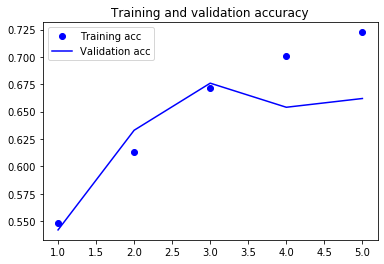

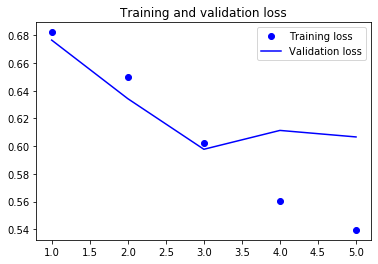

In [32]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Data augmentation

In [33]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [34]:
from tensorflow.keras.preprocessing import image

In [35]:
img_path='Desktop/catdogmodel/train/cat'

In [36]:
path = 'Desktop/catdogmodel/train/cat'

In [38]:
import os

In [39]:
from tensorflow.keras.preprocessing import image
fnames = [os.path.join(path, fname) for
          fname in os.listdir(path)]

In [40]:
img_path = fnames[1]

In [41]:
img = image.load_img(img_path, target_size=(150, 150))

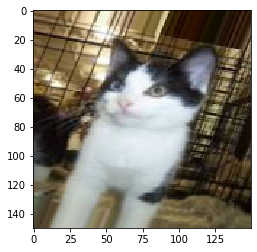

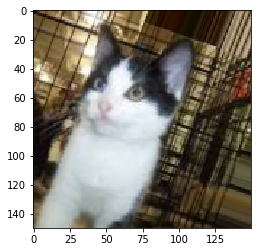

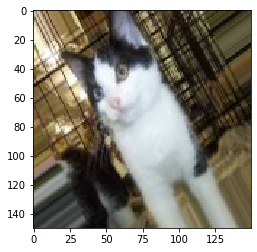

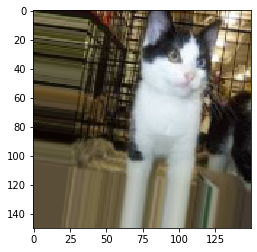

In [42]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [43]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [44]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

In [2]:
test_datagen = ImageDataGenerator(rescale=1./255)   #normalize

NameError: name 'ImageDataGenerator' is not defined

In [47]:
train_generator = train_datagen.flow_from_directory(
train_path,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [49]:
validation_generator = test_datagen.flow_from_directory(
valid_path,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

Found 1000 images belonging to 2 classes.


In [50]:
history = model.fit_generator(
train_generator,
steps_per_epoch=5,
epochs=5,
validation_data=valid_generator,
validation_steps=50)

Epoch 1/5
5/5 [==============================] - 36s 7s/step - loss: 0.6940 - acc: 0.5250 - val_loss: 0.6912 - val_acc: 0.5110
Epoch 2/5
5/5 [==============================] - 34s 7s/step - loss: 0.6996 - acc: 0.4625 - val_loss: 0.6910 - val_acc: 0.5060
Epoch 3/5
5/5 [==============================] - 35s 7s/step - loss: 0.6959 - acc: 0.4875 - val_loss: 0.6940 - val_acc: 0.5000
Epoch 4/5
5/5 [==============================] - 35s 7s/step - loss: 0.6961 - acc: 0.5250 - val_loss: 0.6895 - val_acc: 0.5640
Epoch 5/5
5/5 [==============================] - 34s 7s/step - loss: 0.6983 - acc: 0.4500 - val_loss: 0.6877 - val_acc: 0.5740


In [52]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=5,
validation_data=valid_generator,
validation_steps=50)

Epoch 1/5
100/100 [==============================] - 251s 3s/step - loss: 0.6855 - acc: 0.5574 - val_loss: 0.6657 - val_acc: 0.6170
Epoch 2/5
100/100 [==============================] - 254s 3s/step - loss: 0.6683 - acc: 0.5920 - val_loss: 0.6399 - val_acc: 0.6490
Epoch 3/5
100/100 [==============================] - 253s 3s/step - loss: 0.6550 - acc: 0.6021 - val_loss: 0.6374 - val_acc: 0.6240
Epoch 4/5
100/100 [==============================] - 241s 2s/step - loss: 0.6374 - acc: 0.6288 - val_loss: 0.6159 - val_acc: 0.6530
Epoch 5/5
100/100 [==============================] - 245s 2s/step - loss: 0.6255 - acc: 0.6470 - val_loss: 0.6187 - val_acc: 0.6470


In [53]:
model.save('cats_and_dogs_small_2.h5')

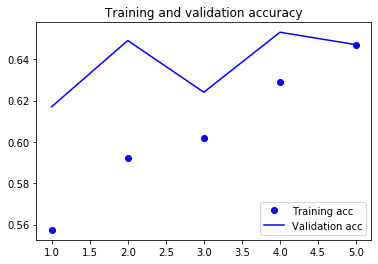

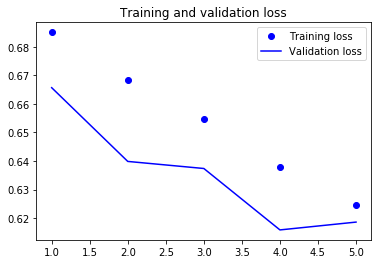

In [54]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [56]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 273s 5us/step


In [57]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [58]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [59]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [61]:
>>> print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

>>> conv_base.trainable = False
>>> print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))


This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)


In [63]:
train_generator = train_datagen.flow_from_directory(
train_path,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [64]:
validation_generator = test_datagen.flow_from_directory(
valid_path,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 1000 images belonging to 2 classes.


In [67]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

In [68]:
history = model.fit_generator(
train_generator,
steps_per_epoch=10,
epochs=5,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/5
10/10 [==============================] - 253s 25s/step - loss: 0.5656 - acc: 0.7700 - val_loss: 0.5118 - val_acc: 0.7990
Epoch 2/5
10/10 [==============================] - 253s 25s/step - loss: 0.5791 - acc: 0.7300 - val_loss: 0.5013 - val_acc: 0.7840
Epoch 3/5
10/10 [==============================] - 254s 25s/step - loss: 0.5604 - acc: 0.7100 - val_loss: 0.4770 - val_acc: 0.8130
Epoch 4/5
10/10 [==============================] - 253s 25s/step - loss: 0.5638 - acc: 0.6750 - val_loss: 0.4712 - val_acc: 0.8180
Epoch 5/5
10/10 [==============================] - 253s 25s/step - loss: 0.5365 - acc: 0.7550 - val_loss: 0.4534 - val_acc: 0.8220
